In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy as sp
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from scipy.spatial.distance import mahalanobis
from decimal import Decimal
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import math
import pickle

C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Introdução:
<br>
<div style="text-align:justify">
       O trabalho em questão a seguir é um mini-projeto para a disciplina de Inteligência Artificial do curso de Ciência da Computação da Universidade Federal de Campina Grande. Este trabalho tem como objetivo investigar modelos de regressão em dados reais. Para isto será utilizado as técnicas KNN, Random Forest e SGD que serão explicadas em seções posteriores. Para a realização do projeto será utilizada a biblioteca <a href="https://scikit-learn.org/stable/"> scikit-learn </a>. Além disto, será utilizado como base de dados o arquivo:<a href="https://drive.google.com/file/d/1mazO0QvCDqf7o7U9xCC_8EoxnA4qLTEy/view"> dados</a>. Algo a se considerar é que apesar do carater cientificista do projeto, alguns erros de metodologia podem acontecer devido ao nivel de conhecimento do autor sobre o tema e principalmente devido ao tempo empregado para o mesmo. 
</div>

## Descrições Téoricas:
   Nesta seção será feita uma pequena introdução aos algoritmos e a métrica escolhida neste projeto.
   

   <div> 
    <br>
    - Random Forest:
<br>
   <p style="text-align: justify;">  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Random Forest é uma das técnicas mais famosas de aprendizado de máquina. A ideia do algoritmo é criar várias árvores de decisão que se combinam para então se um modelo com uma maior acurácia e que possui uma predição mais estável. Está tecnica pode ser utilizado tanto para classificação quanto para regressão. Uma desvantagem do algoritmo é que apesar de ser rápido para treinar, eles podem ser lentos para predições. Algumas vantagens deste algoritmo incluem: 
       <br>
       <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- É um algoritmo que consegue lidar com valores faltantes, mantendo boa acurácia
       <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- O modelo tem uma probabilidade menor de sofrer overfitting quando comparado com o modelo de árvores de decisão
     </p>
    <br>
    - SGD:
    <p style="text-align: justify;">  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SGD ou Stochastic gradient descent é um método iterativo para otimizar uma função de perda. As vantagens do SGD são a eficiência e a facilidade de implementação. No nosso caso, como utilizaremos o scikit learn, não precisaremos implementar a função. Além disto, o próprio scikit learn indica(https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) o SGD como uma boa forma de regressão. Contudo, algumas desvantagem do algoritmo incluem:
          <br>
       <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- SGD requer um número de hiper-parâmetros tais como o parâmetros de regularização e o número de iterações
         <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- SGD é sensível ao dimensionamento de variáveis
           
   Caso o leitor queira saber mais sobre o SGD, ao final deste documento foi colocado alguns vídeos que podem o ajudar. Contudo, é necessário que o leitor tenha conhecimento em cálculo avançado para tal. 
   </p><br>
   <p>- KNN:
    <br>
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;KNN ou k-Nearest Neighbors é um algoritmo bastante popular utilizado em aprendizado de máquina. A ideia do algoritmo é separar o nosso conjunto de dados em K classes e a partir disso verificar a que classe pertence nossas predições. Algumas desvantagens é que o algoritmo pode ser lento quando a quantidade de dados é grande. Algumas vantagens são:
    <br>
    <div> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Conceitos complexos podem ser aprendidos por simples procedimentos que se utilizam de 
 <a href="https://www.dicasdecalculo.com.br/conteudos/derivadas/aplicacoes-de-derivadas/aproximacao-linear-local/"> 
      aproximação local </a>
          </div>
    <div>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Não é necessário fazer suposições sobre as caracteristicas dos conceitos que necessitam ser aprendidos
    </div>
   </p>
   <p>- RMSE:
      <p style="text-align: justify;"> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;É uma medida que mede a diferença entre dos valores previstos pelo modelo ou pelo estimador e dos valores esperados. 
    Mais informações podem ser vistas em: <a href="https://www.statisticshowto.datasciencecentral.com/rmse/"> rmse </a> 
      </p>
   </p>
</div>


## Sobre os dados:
<br>
   <div style="text-align:justify"> Os dados supracitados se tratam de informações sobre preços de venda de carros. As colunas dos dados são: 'Price', 'Year', 'Mileage', 'City', 'Estado', 'Vin', 'Make' e 'Model'. O significado dessas colunas pode ser visto na tabela a seguir:
   </div> 


 <table style="border: 1px solid black;">
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">Preço</td>
    <td>O Preço do carro</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">Year</td>
    <td>O ano de fabricação do carro</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">Mileage</td>
    <td>Quantas milhas o carro possui</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">City</td>
    <td>A cidade que este carro foi vendido</td>
  </tr>
   <tr style="border: 1px solid black;">
     <td style="border: 1px solid black;">State</td>
    <td>O estado(unidade federativa) que este carro foi vendido</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">Vin</td>
    <td>Vin é uma sigla para Vehicle Identification Number(Número de Identificação do Veículo). No brasil conhecido como número do chassi</td>
  </tr>
   <tr style="border: 1px solid black;">
    <td style="border: 1px solid black;">Make</td>
    <td>Fabricante do carro</td>
  </tr>
       <tr>
    <td style="border: 1px solid black;">Model</td>
    <td>Modelo do carro</td>
  </tr>
</table>

Um pouco mais sobre os dados:

In [41]:
## Lendo os dados para o dataframe
df = pd.read_csv('true_car_listings.csv')
##Mostrando as 5 primeiras linhas do meu dataframe
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


<div style="text-align:justify"> Como podemos ver, as colunas "City", "State", "Make" e "Model" e "Vin" se tratam de variáveis categóricas. Enquanto as colunas "Price", "Year" e "Mileage" se tratam de dados inteiros. Devido a isto, posteriormente precisaremos fazer um pre-processamento nas variáveis categóricas. Além disto, outro dado sobre a base de dados é que ela possuia 852122 linhas, ou seja, 852122 informações das colunas supracitadas.
</div>

## Metodologia :
<br>
<div style="text-align:justify">
   A Metodologia que será utilizada neste estudo será:<br><br>
   i. Será separado o conjunto de dados em dois subconjuntos aleatórios disjuntos: treinamento e validação, na proporção de 80% -20% do tamanho do conjunto original, respectivamente. <br>
   ii. Será feito um treinamento utilizando cada uma das técnicas supracitadas utilizando o conjunto de treinamento e será avaliado o modelo computando o rmse. <br>
   iii. Os passos i e ii serão repetidos 10 vezes. A partir disto será calculado o desvio-padrão e a média do rmse obtido.<br>
   
   <p style="text-align:justify"> Após isto, será utilizado técnicas de pré-processamento nos dados, extração/redução de características e modificações nos modelos propostos com o intuito de se diminuir o rmse dos modelos. Por último, mas não menos importante, é que a coluna "Vin" será descartada do nosso modelo. O motivo é que a informação da coluna em questão é única para cada linha, tornando-se assim irrelevante para nosso modelo de regressão. Além disto, como o SGD possui problemas relacionados com dimensionamento de recursos será utilizado a função 
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html"> preprocessing.scale</a> 
    neste modelo. </p>
</div>

## Predições Iniciais : 
   <br>
   <div> Nesta seção será feito os passos descritos anteriormente na seção de metodologia. No final da seção serão informados o desvio-padrão e a média dos scores obtidos. </div>

In [166]:
"""
   Função que calcula o rmse
Atributos:
    predicted: Conjunto de dados que foram previstos para o modelo a partir dos dados que foram utilizados para teste(X_test)
    y_test: Conjunto de dados das váriavel dependente que sera utilizada para testar nosso modelo
"""
def calculateRMSE(predicted, y_test):
    sum = 0
    for i in range(len(predicted)):
        sum += (predicted[i] - y_test[i])**2
    return (sum/len(predicted))**(0.5)

"""
   Função que treina e calcula o rmse do modelo knn
Atributos:
    X_train: Conjunto de dados das váriaveis independetes que serão utilizados para testar nosso modelo
    y_train: Conjunto de dados das váriavel dependente que sera utilizada para treinar nosso modelo
    X_test: Conjunto de dados das váriaveis independetes que serão utilizados para testar nosso modelo
    y_test: Conjunto de dados das váriavel dependente que sera utilizada para testar nosso modelo
"""
def calculateRmseKNN(X_train, y_train, X_test, y_test):
    knn = neighbors.KNeighborsRegressor()
    knn.fit(X_train, y_train)
    return calculateRMSE(knn.predict(X_test), y_test)

"""
   Função que treina e calcula o rmse do modelo Random Forest
Atributos:
    X_train: Conjunto de dados das váriaveis independetes que serão utilizados para testar nosso modelo
    y_train: Conjunto de dados das váriavel dependente que sera utilizada para treinar nosso modelo
    X_test: Conjunto de dados das váriaveis independetes que serão utilizados para testar nosso modelo
    y_test: Conjunto de dados das váriavel dependente que sera utilizada para testar nosso modelo
"""
def calculateRmseRandomForest(X_train, y_train, X_test, y_test):
    regr_2 = RandomForestRegressor()
    regr_2.fit(X_train,y_train)
    return calculateRMSE(regr_2.predict(X_test), y_test)

"""
   Função que treina e calcula o rmse do modelo SGD
Atributos:
    X_train: Conjunto de dados das váriaveis independetes que serão utilizados para testar nosso modelo
    y_train: Conjunto de dados das váriavel dependente que sera utilizada para treinar nosso modelo
    X_test: Conjunto de dados das váriaveis independetes que serão utilizados para testar nosso modelo
    y_test: Conjunto de dados das váriavel dependente que sera utilizada para testar nosso modelo
"""
def calculateRmseSGD(X_train, y_train, X_test, y_test):
    clf = linear_model.SGDRegressor(tol=1e-3, max_iter=1000)
    #feature scaling
    clf.fit(preprocessing.scale(X_train) ,preprocessing.scale(y_train))
    return calculateRMSE(clf.predict(X_test), y_test)

"""
   Função que transforma os dados das váriaveis categóricas em interiors. Ver função factorize do pandas.
Atributos:
    df: DataFrame com os dados apresentados no inicio do documento
"""
def transformCategoricalValuesIntoInteger(df):
    df["City"] = pd.factorize(df["City"])[0]
    df["State"] = pd.factorize(df["State"])[0] 
    df["Make"] = pd.factorize(df["Make"])[0] 
    df["Model"] = pd.factorize(df["Model"])[0] 
    return df

## Lendo os dados para o dataframe
df = pd.read_csv('true_car_listings.csv')
## Excluindo coluna vin do dataframe
df = df.drop(['Vin'], axis=1)
## transformando váriaveis categoricas em inteiros. Necessário para utilizar os modelos.
df = transformCategoricalValuesIntoInteger(df)

## Separando o dataframe em variaveis dependente(y): Price e independentes: Todas as outras. 
X = np.array(df.drop(['Price'], axis=1))
y = np.array(df['Price'])

rmse = {}
rmse["knn"] = []
rmse["rf"] = []
rmse["sgd"] = []

#Valores arbitrários que serão utilizados como sementes durante a separação entre dados de treino e de teste.
seeds = [30, 100, 50, 20, 10, 15, 77, 49, 65, 10]

#Calculando os scores
for seed in seeds:
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=seed)
    rmse["knn"].append(calculateRmseKNN(X_train, y_train, X_test, y_test))
    rmse["rf"].append(calculateRmseRandomForest(X_train, y_train, X_test, y_test))
    rmse["sgd"].append(calculateRmseSGD(X_train, y_train, X_test, y_test))


C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int

   <div> A partir do treinamento feito anteriormente, obtivemos alguns valores de rmse dos modelos treinados. Com estes valores será calculada a média e o desvio padrão: </div>

In [151]:
"""
   Função que calcula a média do rmse dos modelos 
Atributos:
    rmse: Dicionário que contém listas com os valores dos rmse dos modelos knn, sgd e random forest
"""
def calculateAverageScores(rmse):
    summ = {}
    media = {}
    summ["knn"] = 0
    summ["rf"] = 0
    summ["sgd"] = 0 
    
    for i in range(10):
        summ["knn"] += rmse["knn"][i]
        summ["rf"] += rmse["rf"][i]
        summ["sgd"] += rmse["sgd"][i]


    media["knn"] = summ["knn"] / 10.0
    media["rf"] = summ["rf"] / 10.0
    media["sgd"] = summ["sgd"] / 10.0
    
    return media

"""
   Função que calcula o desvio padrão do rmse dos modelos 
Atributos:
    rmse: Dicionário que contém listas com os valores dos rmse dos modelos knn, dts e lasso
    media: Dicionário que contém os valores das médias de scores dos modelos knn, dts e lasso
"""
def calculateStandartDeviation(rmse, media):
    summ = {}
    dp = {}
    summ["knn"] = 0
    summ["rf"] = 0
    summ["sgd"] = 0 
    
    for i in range(10):
        summ["knn"] += (rmse["knn"][i] - media["knn"])**2
        summ["rf"] += (rmse["rf"][i]  - media["rf"])**2
        summ["sgd"] += (rmse["sgd"][i]  - media["sgd"])**2


    dp["knn"] = (summ["knn"] / 10.0) ** 0.5
    dp["rf"] = (summ["rf"] / 10.0) ** 0.5
    dp["sgd"] = (summ["sgd"] / 10.0) ** 0.5
    
    return dp

media = calculateAverageScores(rmse)
dp = calculateStandartDeviation(rmse, media)

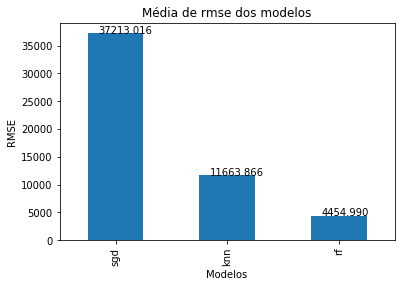

In [152]:
mediaDF = pd.DataFrame.from_dict(media, orient='index')
mediaDF.columns = ['media']
mediaDF = mediaDF.sort_values(['media'], ascending=[0])
my_plot = mediaDF.plot(kind='bar',legend=None,title="Média de rmse dos modelos")
my_plot.set_xlabel("Modelos")
my_plot.set_ylabel("RMSE")
for p in my_plot.patches:
    my_plot.annotate('{:.3f}'.format(Decimal(str(p.get_height()))), (p.get_x()+0.1, p.get_height()))

In [149]:
clf = linear_model.SGDRegressor(tol=1e-3, max_iter=1000)
X = np.array(df.drop(['Price'], axis=1))
y = np.array(df['Price'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=seed)

clf.fit(preprocessing.scale(X_train) ,preprocessing.scale(y_train))
calculateRMSE(clf.predict(X_test), y_test)

C:\Users\rbrun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


35730.08124303972

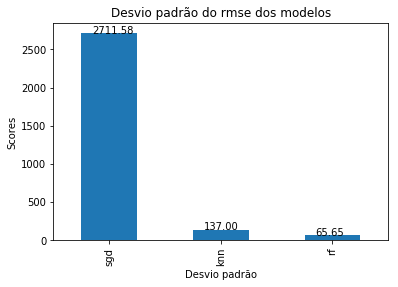

In [153]:
dpDF = pd.DataFrame.from_dict(dp, orient='index')
dpDF.columns = ['dp']
dpDF = dpDF.sort_values(['dp'], ascending=[0])
my_plot = dpDF.plot(kind='bar',legend=None,title="Desvio padrão do rmse dos modelos")
my_plot.set_xlabel("Desvio padrão")
my_plot.set_ylabel("Scores")
for p in my_plot.patches:
    my_plot.annotate('{:.2f}'.format(Decimal(str(p.get_height()))), (p.get_x()+0.1, p.get_height()))

<div style="text-align:justify"> Como podemos ver a partir dos gráficos acima, o modelo que alcançou um melhor rmse(quanto mais baixo, melhor) foi o modelo random forest. Além disso, podemos notar que o desvio padrão de todos os modelos não foi tão alto. A partir disso podemos inferir que os dados são um pouco consistentes para a predição. Ou seja, apesar de termos obtido diferentes médias de rmse para os diferentes modelos, as variações entre as predições de cada modelo foi de média para baixa. </div>


## Técnicas de Pre-processamento : 

Nesta seção exploraremos algumas técnicas de pré-processamento. O objetivo dessas técnicas são de melhorar as predições dos modelos utilizados neste documento. 

#### - Checagem de valores nulos ou vazios:

Uma técnica de pré-processamento bastante utilizada é a checagem de valores vazios ou nulos nas nossas colunas de dados. Caso se encontre algum valor nulo, geralmente a linha que possui este tipo de dado é apagada da nossa base de dados. 

In [5]:
df = pd.read_csv('true_car_listings.csv')
df = df.drop(['Vin'], axis=1)
df = transformCategoricalValuesIntoInteger(df)


In [24]:
df.isnull().values.any()

False

In [25]:
def checkIsHasEmpty(): 
    hasEmpty = False
    for i in range(df['State'].size):
        if (df['State'][i].strip() == '' or df['City'][i].strip() == '' or df['Make'][i].strip() == '' or 
            df['Model'][i].strip() == ''):
            hasEmpty = True
    return hasEmpty

checkIsHasEmpty()

False

<div style="text-align:justify"> A partir do que foi exposto acima, conseguimos ver que o conjunto de dados não possui valores nulos e também suas váriaveis categóricas não possuem valores vazios </div>

#### - Normalização de variaveis categóricas:

<div style="text-align:justify"> O nosso conjunto de dados possui inúmeras variáveis categóricas. Devido a isso aumenta-se a probabilidade de alguns ruidos nos nossos dados. Por exemplo, imaginemos se nossos dados possuam os modelos de carro Palio e PAlio. Durante a transformação ocorrerá um erro, já que será identificado que Palio e PAlio são dois modelos differentes de carro, quando na verdade não o são. O mesmo acontece devido a diferença de espaços. Por exemplo, a string 'Palio' será diferente da string 'Palio  ' ou '  Palio'. O algoritmo utilizado pode ser visto abaixo:
</div>



'''
variables = ["City", "State", "Make", "Model"]
    for vr in variables:
         df[vr] = np.where(df[vr].apply(lambda x: isinstance(x, str)),
                           df[vr].str.upper().str.replace(r'\s', ''),
                           df[vr])
'''


<img src="rmsePadNormalization2.jpg"> </img>

A partir do gráfico acima podemos ver que a variação da média encontrada permaneceu no intervalo do desvio padrão encontrado anteriormente. O que pode indicar que os dados não possuem este tipo de ruido indicado acima. Além disto, não houve diminuição significativa do desvio padrão.

#### - Mudança no uso da técnica de transformação das variaveis categoricas:
   <br>
   <div> 
    Caso o leitor não se lembre, em nossas predições inicias foi utilizada a função <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.factorize.html"> factorize </a> do pandas. A partir disso foi tentado utilizar a função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html"> LabelEncoder </a> do scikit, uma função bastante utilizada para transformar váriaveis categóricas em inteiras. Os resultados como podem ser vistos no gráfico abaixo, é de que a função factorize conseguiu gerar melhores predições em todos modelos do que a função LabelEncoder. Já que as médias de quase todos os modelos não aumentaram fora do intervalo do desvio padrão. Além disto, não houve diminuição significativa do desvio padrão.
   </div>

<img src="rmseLabelEncodizer2.jpg"> </img>

 #### - Remoção de dados duplicados:
 <br>
   <div style="text-align: justify"> Outra técnica de pre-preprocessamento bastante utilizada é a remoção de dados duplicados. Para isto utilizamos a função <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html"> drop_duplicates </a> da biblioteca pandas. Foram removidos todas as linhas que eram duplicadas deixando apenas a primeira. A partir disso foi calculado novamente a média dos rmse. Como pode ser visto abaixo, não houve muita diferença no resultado obtidos no modelo sem tratamento. Além disto, não houve diminuição significativa do desvio padrão.</div>


<img src="rmseDuplicates4.jpg"> </img>

#### - Seleção de variáveis:
   <br>
   <div style="text-align:justify"> A seleção de váriaveis pode ser definido como o processo de escolher dentro as variáveis disponiveis no modelo, aquelas que mais são capazes de predizer o modelo proposto. Em outras palavras, nesta seção reduziremos o número de colunas do nosso dataframe a fim de obter melhores valores de rmse para os nossos modelos. O scikit learn nos oferece um certo <a href="https://scikit-learn.org/stable/modules/feature_selection.html"> número de modelos</a> para seleção de variáveis. Contudo, nossos dados possuem poucas colunas(6) de váriaveis indepentes. Além disto, nossos modelos apresentam um desvio padrão baixo. Por último, o tempo computacional para predição dos modelos não é tão alto. Sendo assim, foi testado todas as combinações de colunas para cada modelo para então decidir quais seriam as melhores variáveis para cada modelo. Um exemplo de excecução do algoritmo pode ser visto abaixo. Note que para o exemplo se dá para o knn(calculateRmseKNN). Para verificar outros algoritmos, utilize(calculateRmseRandomForest ou calculateRmseSGD) </div>


In [119]:
'''
df = pd.read_csv('true_car_listings.csv')
## Excluindo coluna vin do dataframe
df = df.drop(['Vin'], axis=1)
df = transformCategoricalValuesIntoInteger(df)

iterable = ["City", "State", "Make", "Model", "Year", "Mileage"]
values = {}
for index in range(3):
    seeds = [30, 100, 50]
    for i in range(1, 6):
        for subset in itertools.combinations(iterable, i):
            k = df.copy()
            k = k.drop(list(subset), axis=1)
            X = np.array(k.drop(['Price'], axis=1))
            y = np.array(k['Price'])
            X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=seeds[index])
            if str(list(subset)) not in values:
                values[str(list(subset))] = 0
            values[str(list(subset))] += calculateRmseRandomForest(X_train, y_train, X_test, y_test)

s = [(k, values[k]) for k in sorted(values, key=values.get, reverse=True)]
for k, v in s:
    print(k, v/3.0)
'''


Os resultados como pode ser vistos na image abaixo, são bastante satisfatórios. Houve uma diminuição bem acentuada no RMSE de todos os modelos. Além disso, houve uma diminuição bastante interessante no desvio padrão dos modelos KNN e SGD. Eliminados do nosso modelos, as variáveis: City, State, Mileage

<img src="rmseAfterSelection.jpg"> </img>

<img src="rmseDPAfterSelection.jpg"> </img>

#### - Remoção de outliers:
<br>
   <div style="text-align:justify">
       Remoção de outliers é uma parte importante da etapa de pré-processamento de dados. Isso ocorre pois outliers podem prejudicar determinado modelos, principalmente os lineares, ao indicarem valores que de fato não representam aquele modelo, gerando então problemas para a regressão como um todo. Contudo, a remoção de outliers pode vir a gerar um overfitting no modelo, uma vez que será reduzido o range dos dados.
   </div>

##### Usando IQR:
   O intervalo interquantil é uma medida para calcula a dispersão dos dados. Um outlier é todo valor que fora deste intervalo. Ou seja, um valor que está fora do intervalo de medição da maioria dos dados. Geralmente um erro vai se encaixar nestes casos.

 


 


Código utilizado:
<br>
Q1 = df.quantile(0.25)
<br>
Q3 = df.quantile(0.75)
<br>
IQR = Q3 - Q1
<br>
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<img src="rmseAfterRemoveOutlier.jpg"> </img>

<img src="rmseDPAfterRemoveOutlier.jpg"> </img>

## Links interessantes:

Algumas fontes que foram utilizadas na produção deste documento e que podem ser interessantes caso o leitor queira saber mais sobre os assuntos mencionados neste documento: 
<div>
<a href="http://www.iasri.res.in/ebook/win_school_aa/notes/Data_Preprocessing.pdf"> Data preprocessing techniques for data mining </a>
</div>
<div>
<a href="https://www.researchgate.net/publication/320161439_Review_of_Data_Preprocessing_Techniques_in_Data_Mining"> Review of Data Preprocessing Techniques in Data Mining </a>
</div>
<div>
<a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba"> Ways to Detect and Remove the Outliers
 </a>
 </div>
<div>
<a href="https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd"> The Random Forest Algorithm
 </a>
</div>
<div>
<a href="https://www.youtube.com/watch?v=umAeJ7LMCfU"> Gradient Descent - Artificial Intelligence for Robotics
</a>
</div>
<div>
 <a href="https://www.youtube.com/watch?v=jc2IthslyzM"> 3.5: Mathematics of Gradient Descent - Intelligence and Learning </a>
     </div>
